In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!gdown --id 1_npWgNdRyQ5Pg_1qi29vFP4944CsnBcb

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1_npWgNdRyQ5Pg_1qi29vFP4944CsnBcb 



In [3]:
import os
import numpy as np
from custom_datagen import imageLoader
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import glob
import random

['mask_0.npy', 'mask_1.npy', 'mask_2.npy', 'mask_3.npy', 'mask_5.npy', 'mask_6.npy', 'mask_7.npy', 'mask_8.npy', 'mask_10.npy', 'mask_12.npy', 'mask_14.npy', 'mask_15.npy', 'mask_16.npy', 'mask_17.npy', 'mask_18.npy', 'mask_20.npy', 'mask_23.npy', 'mask_24.npy', 'mask_26.npy', 'mask_28.npy', 'mask_29.npy', 'mask_30.npy', 'mask_32.npy', 'mask_33.npy', 'mask_34.npy', 'mask_38.npy', 'mask_39.npy', 'mask_40.npy', 'mask_41.npy', 'mask_42.npy', 'mask_44.npy', 'mask_45.npy', 'mask_46.npy', 'mask_47.npy', 'mask_48.npy', 'mask_49.npy', 'mask_50.npy', 'mask_52.npy', 'mask_53.npy', 'mask_54.npy', 'mask_55.npy', 'mask_56.npy', 'mask_57.npy', 'mask_58.npy', 'mask_59.npy', 'mask_61.npy', 'mask_63.npy', 'mask_66.npy', 'mask_67.npy', 'mask_68.npy', 'mask_69.npy', 'mask_70.npy', 'mask_71.npy', 'mask_72.npy', 'mask_74.npy', 'mask_75.npy', 'mask_79.npy', 'mask_82.npy', 'mask_83.npy', 'mask_84.npy', 'mask_88.npy', 'mask_89.npy', 'mask_90.npy', 'mask_93.npy', 'mask_95.npy', 'mask_96.npy', 'mask_99.npy', 'm

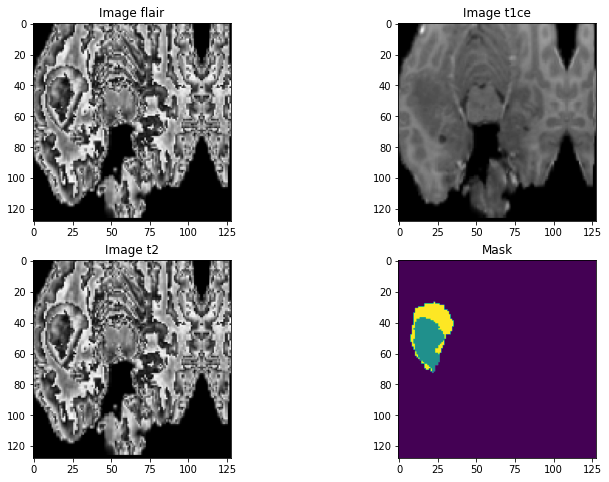

In [6]:
train_img_dir = "/content/gdrive/MyDrive/ColabNotebooks/ImageSegmentation/BraT/input_data_128/train/images/"
train_mask_dir = "/content/gdrive/MyDrive/ColabNotebooks/ImageSegmentation/BraT/input_data_128/train/masks/"

img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

print(msk_list)

num_images = len(os.listdir(train_img_dir))

img_num = random.randint(0,num_images-1)
test_img = np.load(train_img_dir+img_list[img_num])
test_mask = np.load(train_mask_dir+msk_list[img_num])
print(test_mask.shape)
test_mask = np.argmax(test_mask, axis=3)
print(test_mask.shape)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:
train_img_dir = "/content/gdrive/MyDrive/ColabNotebooks/ImageSegmentation/BraT/input_data_128/train/images/"
train_mask_dir = "/content/gdrive/MyDrive/ColabNotebooks/ImageSegmentation/BraT/input_data_128/train/masks/"

val_img_dir = "/content/gdrive/MyDrive/ColabNotebooks/ImageSegmentation/BraT/input_data_128/val/images/"
val_mask_dir = "/content/gdrive/MyDrive/ColabNotebooks/ImageSegmentation/BraT/input_data_128/val/masks/"

train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

val_img_list=os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)

In [ ]:
val_mask_list

1


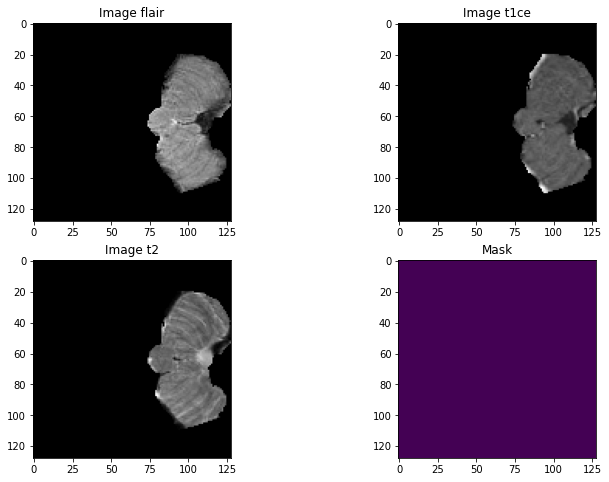

In [ ]:
batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

val_img_datagen = imageLoader(val_img_dir, val_img_list, 
                                val_mask_dir, val_mask_list, batch_size)

img, msk = train_img_datagen.__next__()

img_num = random.randint(0,img.shape[0]-1)
print(img_num)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()



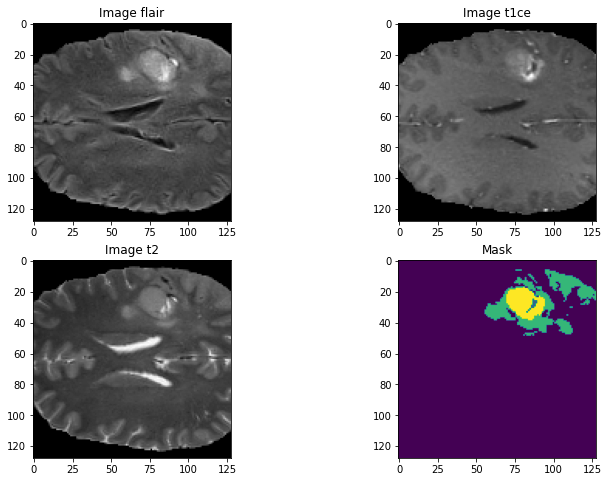

In [ ]:
#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = val_img_datagen.__next__()

img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:
!pip install segmentation-models-3D

In [ ]:
wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
import segmentation_models_3D as sm
dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3])) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

LR = 0.0001
optim = tf.keras.optimizers.Adam(LR)

Segmentation Models: using `tf.keras` framework.


In [ ]:
!gdown --id 1IQ18Gt40GD64rEPvlMv1gFfHTbT4JCRf

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1IQ18Gt40GD64rEPvlMv1gFfHTbT4JCRf 



In [ ]:
batch_size=2

steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size

In [ ]:
from  modified_3d_unet import simple_unet_model

model = simple_unet_model(IMG_HEIGHT=128, 
                          IMG_WIDTH=128, 
                          IMG_DEPTH=128, 
                          IMG_CHANNELS=3, 
                          num_classes=4)

model.compile(optimizer = optim, loss=total_loss, metrics=metrics)
print(model.summary())

print(model.input_shape)
print(model.output_shape)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d (Conv3D)                (None, 128, 128, 12  1312        ['input_1[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 12  0           ['conv3d[0][0]']                 
                                8, 16)                                                        

In [ ]:
history=model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=5,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )

model.save('brats_3d_5epochs.hdf5')
from google.colab import filesf
files.download('brats_3d_5epochs.hdf5') 

Epoch 1/5
285/285 [==============================] - 2198s 8s/step - loss: 0.9565 - accuracy: 0.9389 - iou_score: 0.1737 - val_loss: 0.9553 - val_accuracy: 0.9540 - val_iou_score: 0.1867
Epoch 2/5
285/285 [==============================] - 1733s 6s/step - loss: 0.9888 - accuracy: 0.9510 - iou_score: 0.1861 - val_loss: 0.9956 - val_accuracy: 0.9540 - val_iou_score: 0.1936
Epoch 3/5
285/285 [==============================] - 1617s 6s/step - loss: 0.9978 - accuracy: 0.9528 - iou_score: 0.1779 - val_loss: 0.9953 - val_accuracy: 0.9540 - val_iou_score: 0.1936
Epoch 4/5
285/285 [==============================] - 1540s 5s/step - loss: 0.9974 - accuracy: 0.9528 - iou_score: 0.1779 - val_loss: 0.9921 - val_accuracy: 0.9540 - val_iou_score: 0.1936
Epoch 5/5
285/285 [==============================] - 1543s 5s/step - loss: 0.9969 - accuracy: 0.9528 - iou_score: 0.1779 - val_loss: 0.9921 - val_accuracy: 0.9540 - val_iou_score: 0.1936


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

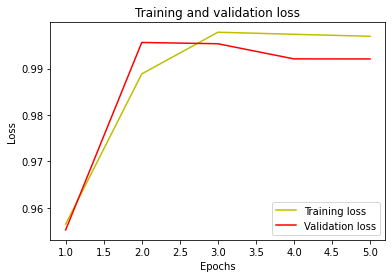

<Figure size 432x288 with 0 Axes>

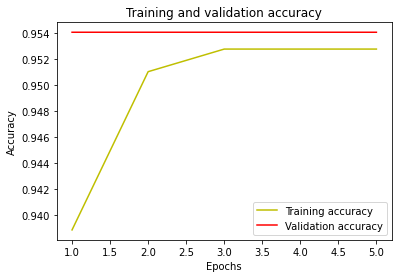

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('Loss_5epochs.png')
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Accuracy_5epochs.png')
plt.show()

files.download('Accuracy_5epochs.png')
files.download('Loss_5epochs.png')

**Continue Training**

In [ ]:
from keras.models import load_model

In [ ]:
!gdown --id 1hGqovmr9lxI6RBOuISzZFnYYaR-PJHiD

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1hGqovmr9lxI6RBOuISzZFnYYaR-PJHiD
To: /content/brats_3d_85epochs.hdf5
100% 68.0M/68.0M [00:00<00:00, 236MB/s]


In [ ]:
my_model = load_model('brats_3d_40epochs.hdf5', 
                      custom_objects={'dice_loss_plus_1focal_loss': total_loss,
                                      'iou_score':sm.metrics.IOUScore(threshold=0.5)})

#Now all set to continue the training process. 
history2=my_model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=5,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )

my_model.save('brats_3d_45epochs.hdf5')

from google.colab import files
files.download('brats_3d_45epochs.hdf5') 

Epoch 1/5
285/285 [==============================] - 2182s 8s/step - loss: 0.8970 - accuracy: 0.9610 - iou_score: 0.3597 - val_loss: 0.9118 - val_accuracy: 0.9632 - val_iou_score: 0.3083
Epoch 2/5
285/285 [==============================] - 1568s 6s/step - loss: 0.8966 - accuracy: 0.9617 - iou_score: 0.3607 - val_loss: 0.9051 - val_accuracy: 0.9639 - val_iou_score: 0.3287
Epoch 3/5
285/285 [==============================] - 1502s 5s/step - loss: 0.8967 - accuracy: 0.9617 - iou_score: 0.3595 - val_loss: 0.9052 - val_accuracy: 0.9647 - val_iou_score: 0.3290
Epoch 4/5
285/285 [==============================] - 1494s 5s/step - loss: 0.8954 - accuracy: 0.9621 - iou_score: 0.3651 - val_loss: 0.9149 - val_accuracy: 0.9629 - val_iou_score: 0.2981
Epoch 5/5
285/285 [==============================] - 1387s 5s/step - loss: 0.8950 - accuracy: 0.9621 - iou_score: 0.3666 - val_loss: 0.9086 - val_accuracy: 0.9637 - val_iou_score: 0.3172


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

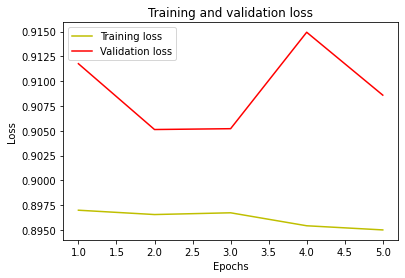

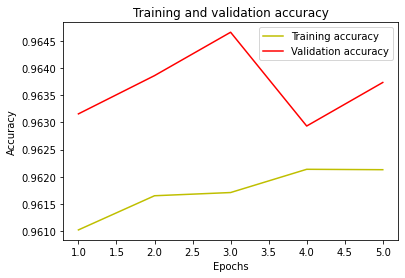

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Loss_45epochs.png')
plt.show()


acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Accuracy_45epochs.png')
plt.show()


files.download('Accuracy_45epochs.png') 
files.download('Loss_45epochs.png') 

**Just Load Model**

In [ ]:
my_model = load_model('brats_3d_45epochs.hdf5', 
                      compile=False)

**Find Mean IOU**

In [ ]:
from keras.metrics import MeanIoU

batch_size=8 #Check IoU for a batch of images
test_img_datagen = imageLoader(val_img_dir, val_img_list, 
                                val_mask_dir, val_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
test_image_batch, test_mask_batch = test_img_datagen.__next__()

test_mask_batch_argmax = np.argmax(test_mask_batch, axis=4)
test_pred_batch = my_model.predict(test_image_batch)
test_pred_batch_argmax = np.argmax(test_pred_batch, axis=4)

n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(test_pred_batch_argmax, test_mask_batch_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

1/1 [==============================] - 5s 5s/step
Mean IoU = 0.4052773


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, precision_score, recall_score

In [ ]:
y=test_mask_batch_argmax
y_pred_i=test_pred_batch_argmax

In [ ]:
y=y[0]
y_pred_i=y_pred_i[0]

In [ ]:
y.shape

(128, 128, 128)

In [ ]:
y_pred_i.shape

(128, 128, 128)

In [ ]:
  SCORE = []
  
  """ Calculating metrics values """
  for i in range(128):
    #y_pred_i[i] = y_pred_i[i].astype(np.int32)
    y_pred = y_pred_i[i].flatten()
    #print(y_pred.shape)
    #y[i] = y[i].astype(np.int32)
    y_i = y[i].flatten()
    #print(y.shape)
    
    acc_value = accuracy_score(y_i, y_pred)
    f1_value = f1_score(y_i, y_pred, labels=[0, 1,2,3], average="macro")
    jac_value = jaccard_score(y_i, y_pred, labels=[0, 1,2,3], average="macro")
    recall_value = recall_score(y_i, y_pred, labels=[0, 1,2,3], average="macro")
    precision_value = precision_score(y_i, y_pred, labels=[0, 1,2,3], average="macro")
    SCORE.append([i, acc_value, f1_value, jac_value, recall_value, precision_value])

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: Unde

In [ ]:
score = [s[1:]for s in SCORE]
score = np.mean(score, axis=0)
print(f"Accuracy: {score[0]:0.5f}")
print(f"F1: {score[1]:0.5f}")
print(f"Jaccard: {score[2]:0.5f}")
print(f"Recall: {score[3]:0.5f}")
print(f"Precision: {score[4]:0.5f}")

Accuracy: 0.98398
F1: 0.31382
Jaccard: 0.29168
Recall: 0.32308
Precision: 0.31511


 **Test**

In [ ]:
img_num = 21

test_img = np.load("/content/gdrive/MyDrive/ColabNotebooks/ImageSegmentation/BraT/input_data_128/val/images/image_"+str(img_num)+".npy")

test_mask = np.load("/content/gdrive/MyDrive/ColabNotebooks/ImageSegmentation/BraT/input_data_128/val/masks/mask_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = my_model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]

1/1 [==============================] - 0s 34ms/step


In [ ]:
for n_slice in range(128):
  y=test_mask_argmax[:,:,n_slice]
  y_pred=test_prediction_argmax[:,:, n_slice]
  # y_pred = y_pred.astype(np.int32)
  # y = y.astype(np.int32)

  """ Flattening the numpy arrays. """
  y = y.flatten()
  y_pred = y_pred.flatten()

  acc_value = accuracy_score(y, y_pred)
  f1_value = f1_score(y, y_pred, labels=[0, 1,2,3], average="micro")
  jac_value = jaccard_score(y, y_pred, labels=[0, 1,2,3], average="micro")
  recall_value = recall_score(y, y_pred, labels=[0, 1,2,3], average="micro")
  precision_value = precision_score(y, y_pred, labels=[0, 1,2,3], average="micro")
  # f1_value = f1_score(y, y_pred, labels=[0, 1,2,3])
  # jac_value = jaccard_score(y, y_pred, labels=[0, 1,2,3])
  # recall_value = recall_score(y, y_pred, labels=[0, 1,2,3])
  # precision_value = precision_score(y, y_pred, labels=[0, 1,2,3])
#SCORE.append([i, acc_value, f1_value, jac_value, recall_value, precision_value])

In [ ]:
#SCORE = []

score = [s[1:]for s in SCORE]
score = np.mean(score, axis=0)
print(f"Accuracy: {score[0]:0.5f}")
print(f"F1: {score[1]:0.5f}")
print(f"Jaccard: {score[2]:0.5f}")
print(f"Recall: {score[3]:0.5f}")
print(f"Precision: {score[4]:0.5f}")

Accuracy: 0.98398
F1: 0.31382
Jaccard: 0.29168
Recall: 0.32308
Precision: 0.31511


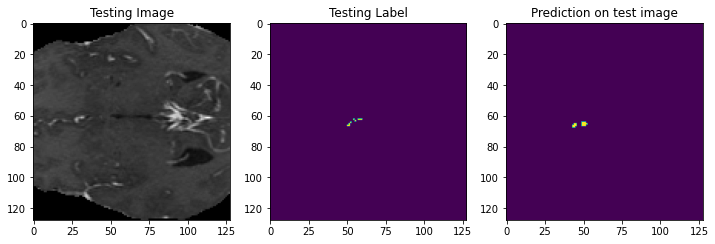

In [ ]:
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice = 50
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
plt.show()